The Boston Housing Dataset

Il Boston Housing Dataset deriva dalle informazioni raccolte dal Servizio censimento degli Stati Uniti in merito agli alloggi nell'area di [Boston MA] (http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html). Di seguito vengono descritte le colonne del set di dati:

* CRIM - tasso di criminalità pro capite per città
* ZN - percentuale di terreni residenziali suddivisi in zone per lotti di oltre 25.000 piedi quadrati
* INDUS - percentuale di acri di affari non al dettaglio per città.
* CHAS - Variabile fittizia Charles River (1 se il tratto limita il fiume; 0 altrimenti)
* NOX - concentrazione di ossidi nitrici (parti per 10 milioni)
* RM - numero medio di camere per abitazione
* AGE - percentuale di unità occupate dal proprietario costruite prima del 1940
* DIS - distanze ponderate verso cinque centri per l'impiego di Boston
* RAD - indice di accessibilità alle autostrade radiali
* TAX - aliquota dell'imposta sulla proprietà a valore pieno per \$10,000
* PTRATIO - rapporto alunno-insegnante per città
* B - 1000(Bk - 0.63)^2 dove Bk è la proporzione di neri per città
* LSTAT - % stato inferiore della popolazione
* MEDV - Valore medio delle case occupate dai proprietari in \$1000's


In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from pandas import read_csv
import seaborn as sns
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [2]:
# Dimensione del dataset
print(np.shape(data))

(506, 14)


In [3]:
# Distribution of the data
print(data.describe())

             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [4]:
#sns.pairplot(data, hue='MEDV');

Fin dall'inizio, due colonne (feature) di dati sono interessanti. Sono: ZN (percentuale di terreni residenziali suddivisi in zone per lotti di oltre 25.000 piedi quadrati) con 0 per il 25°, 50° percentile. In secondo luogo, CHAS: variabile fittizia Charles River (1 se il tratto limita il fiume; 0 altrimenti) con 0 per il 25°, 50° e 75° percentile. Questi summeries sono comprensibili in quanto entrambe le variabili sono variabili condizionali + categoriche. La prima ipotesi sarebbe che questi potrebbero non essere utili nel compito di regressione come la previsione di MEDV (valore mediano delle case occupate dal proprietario).


Un altro fatto interessante nel set di dati è il valore massimo di MEDV. Dalla descrizione dei dati originali, si dice: la variabile n. 14 sembra essere censurata a 50,00 (corrispondente a un prezzo medio di $ 50.000). Sulla base di ciò, valori superiori a 50,00 potrebbero non aiutare a prevedere MEDV. Tracciamo il set di dati e vediamo tendenze / statistiche interessanti.

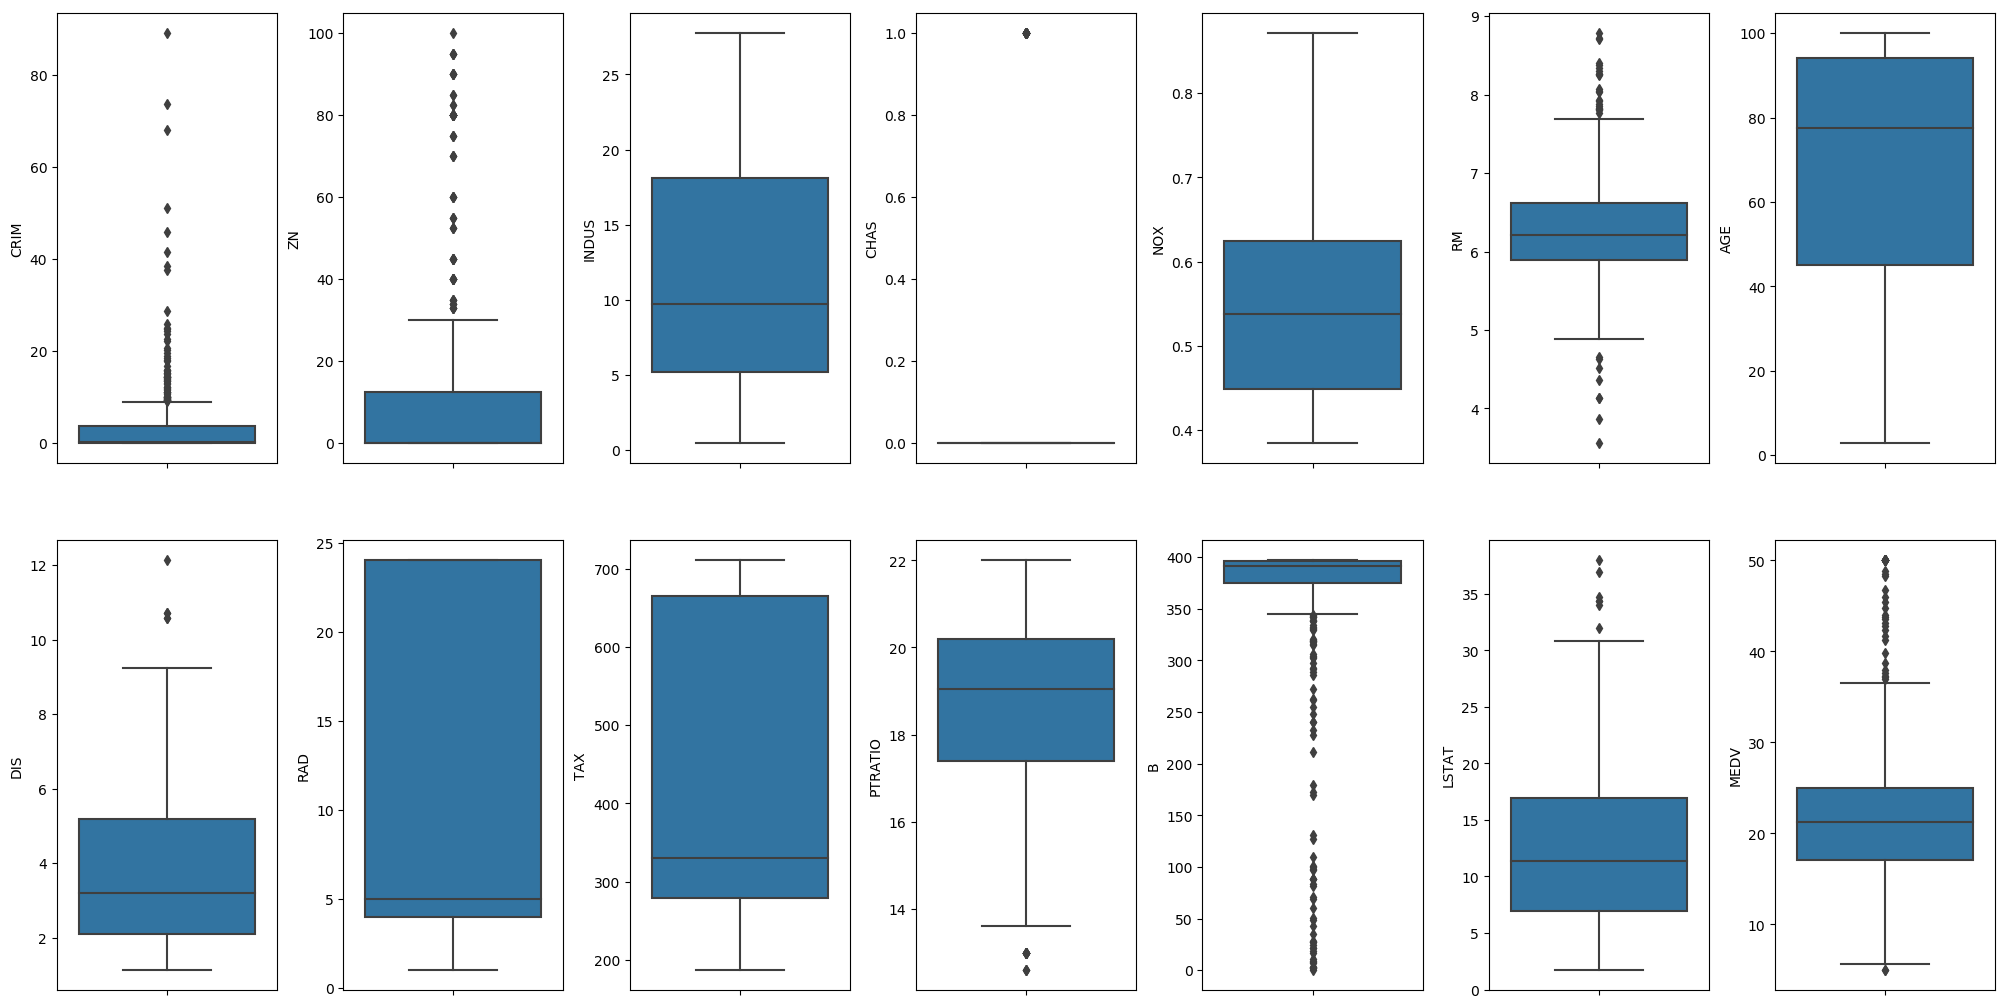

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Le colonne come CRIM, ZN, RM, B sembrano avere valori anomali. Vediamo la percentuale di valori anomali in ogni colonna.

In [6]:
for k, v in data.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))
    
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


Rimuoviamo gli outlier MEDV (MEDV = 50.0) prima di tracciare più distribuzioni

In [7]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


Vediamo come appaiono queste funzionalità e le distribuzioni MEDV

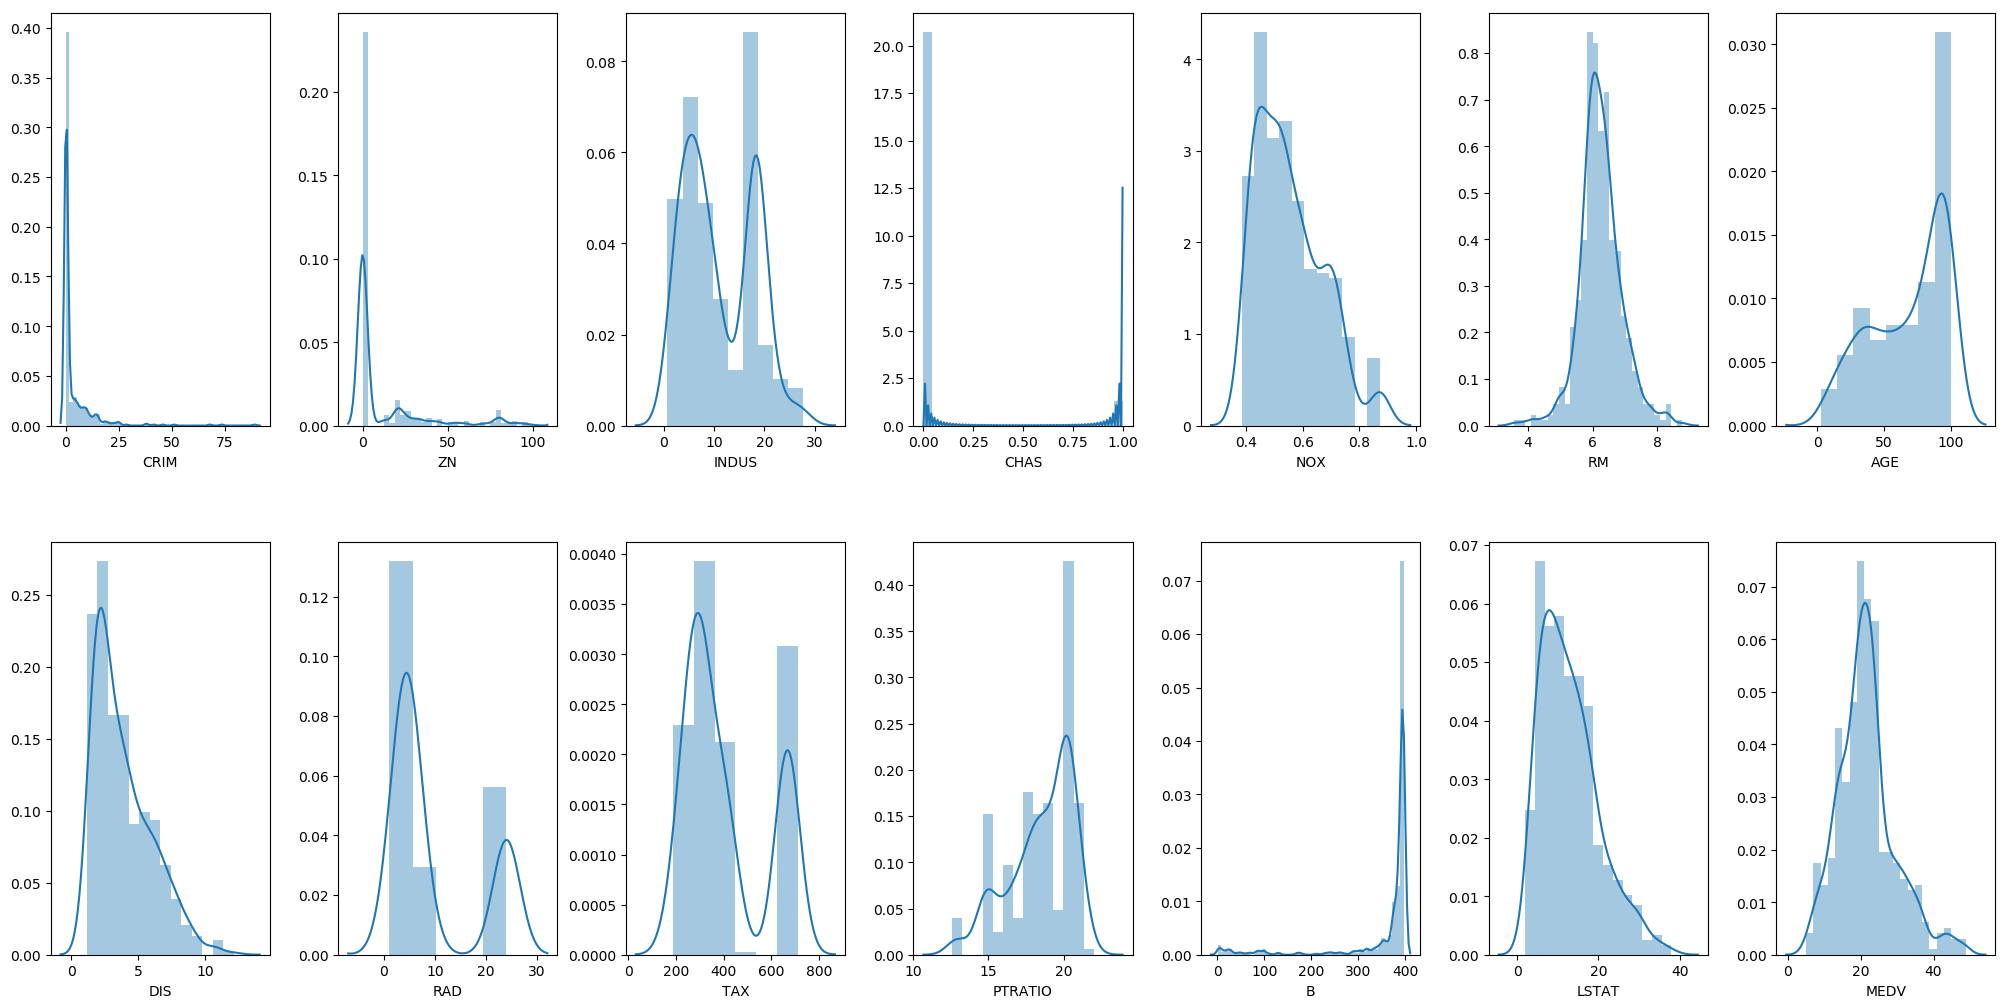

In [8]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

L'istogramma mostra anche che le colonne CRIM, ZN, B hanno distribuzioni fortemente distorte. Anche MEDV sembra avere una distribuzione normale (le previsioni) e altre colonne sembrano avere una distribuzione dei dati secondo norma o bimodel ad eccezione di CHAS (che è una variabile discreta).

Ora tracciamo la correlazione a coppie sui dati.

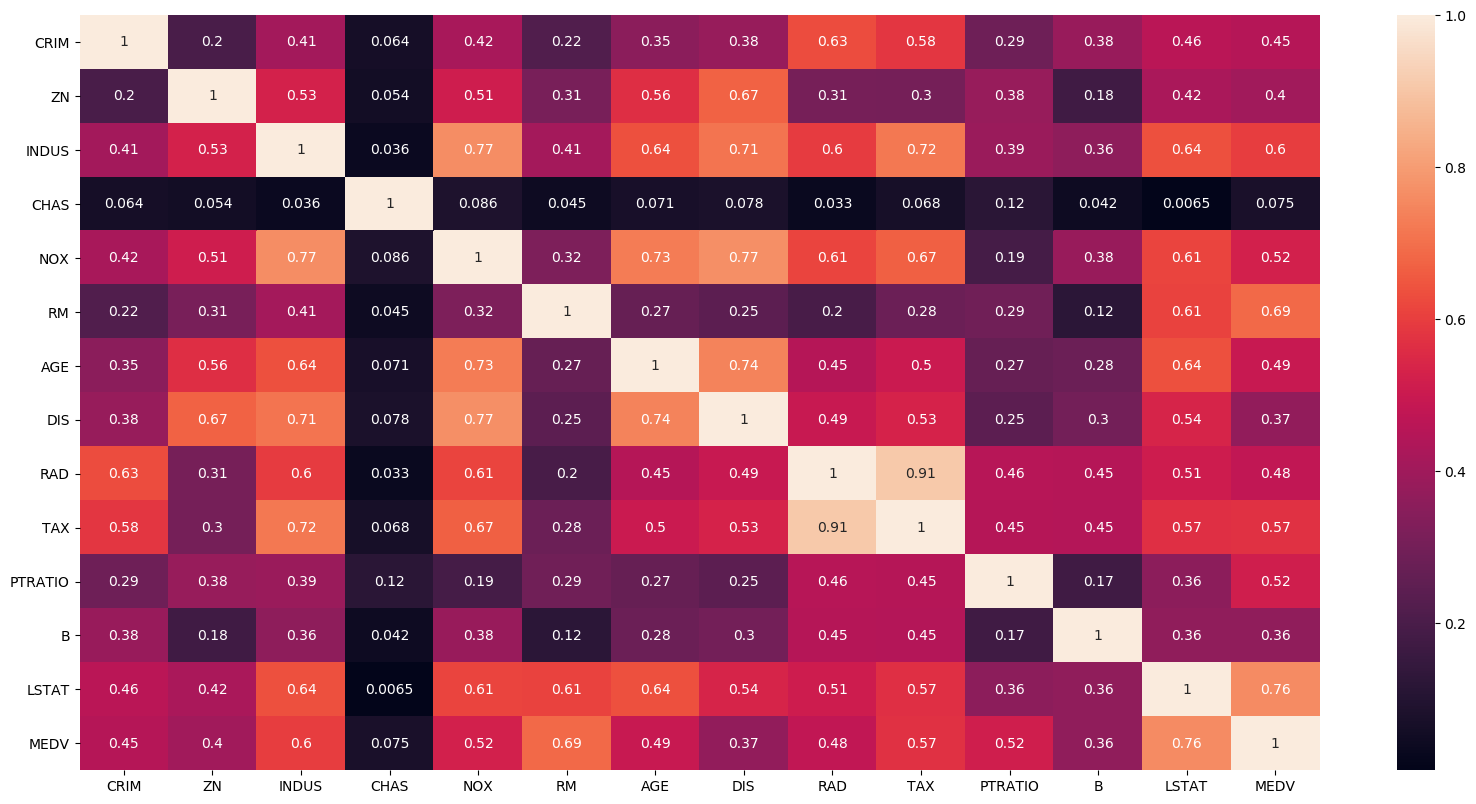

In [9]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

Dalla matrice di correlazione, vediamo TAX e RAD sono feature altamente correlate. Le colonne LSTAT, INDUS, RM, TAX, NOX, PTRAIO hanno un valore di correlazione superiore a 0,5 con MEDV che è una buona indicazione dell'uso come predittori. Tracciamo queste colonne contro MEDV.

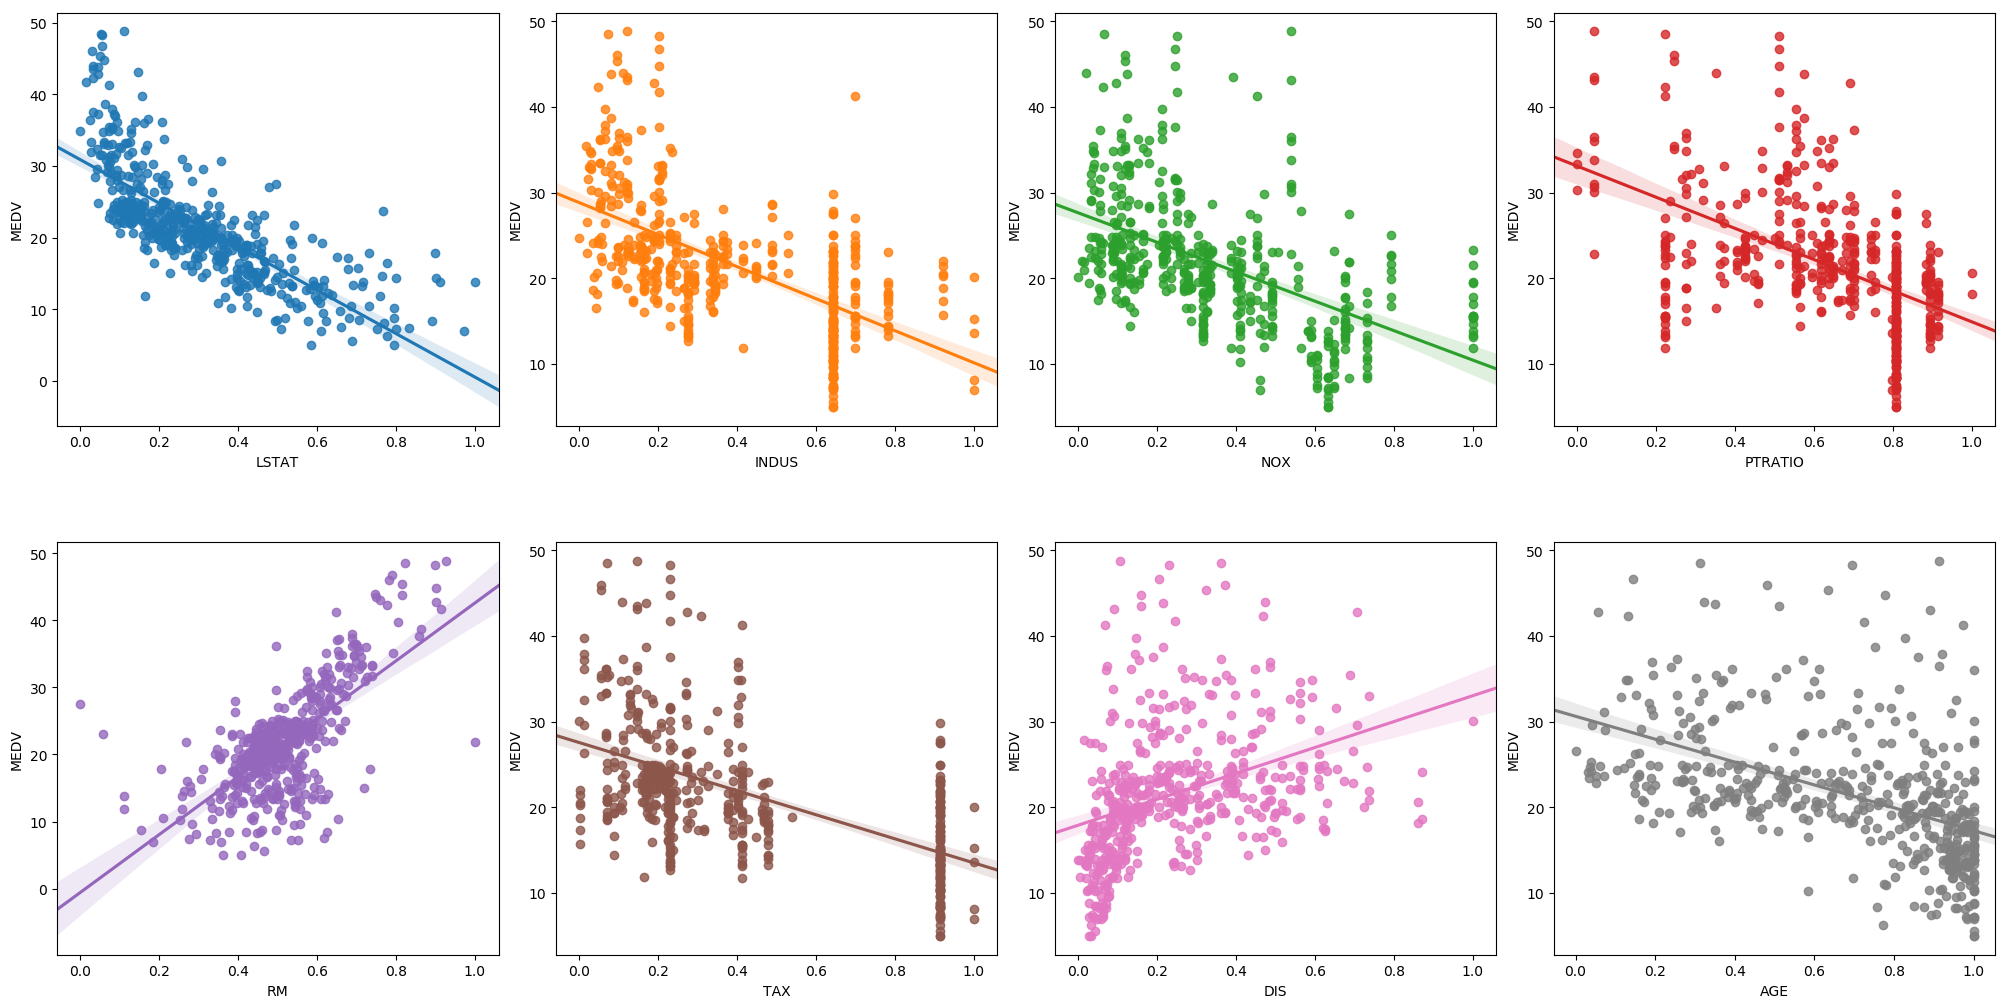

In [10]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


Quindi, con queste analisi, possiamo provare a prevedere MEDV con le funzionalità 'LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE'. Proviamo a rimuovere l'asimmetria della trasformazione del registro tramite i dati.

In [11]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

Proviamo prima Linear, Ridge Regressione sul dataset.

In [12]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['PolyRidge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)
MSE: -0.03 (+/- 0.03)


La regressione Liner con e senza regolarizzazione L2 non fa differenza significativa nel punteggio MSE. Tuttavia la regressione polinomiale con grado = 3 ha un MSE migliore. Proviamo alcune tecniche di regressione non prametrica: SVR con kernal rbf, DecisionTreeRegressor, KNeighborsRegressor ecc.

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
#grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.04 (+/- 0.03)


In [14]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
#grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.05 (+/- 0.04)


In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

KNN Accuracy: -0.04 (+/- 0.02)


Compared to three models which are shosen through grid search, SVR performes better. Let's try an ensemble method finally.

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
#param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
#grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))


MSE: -0.03 (+/- 0.02)


Plottiamo il confronto con k-fold=10

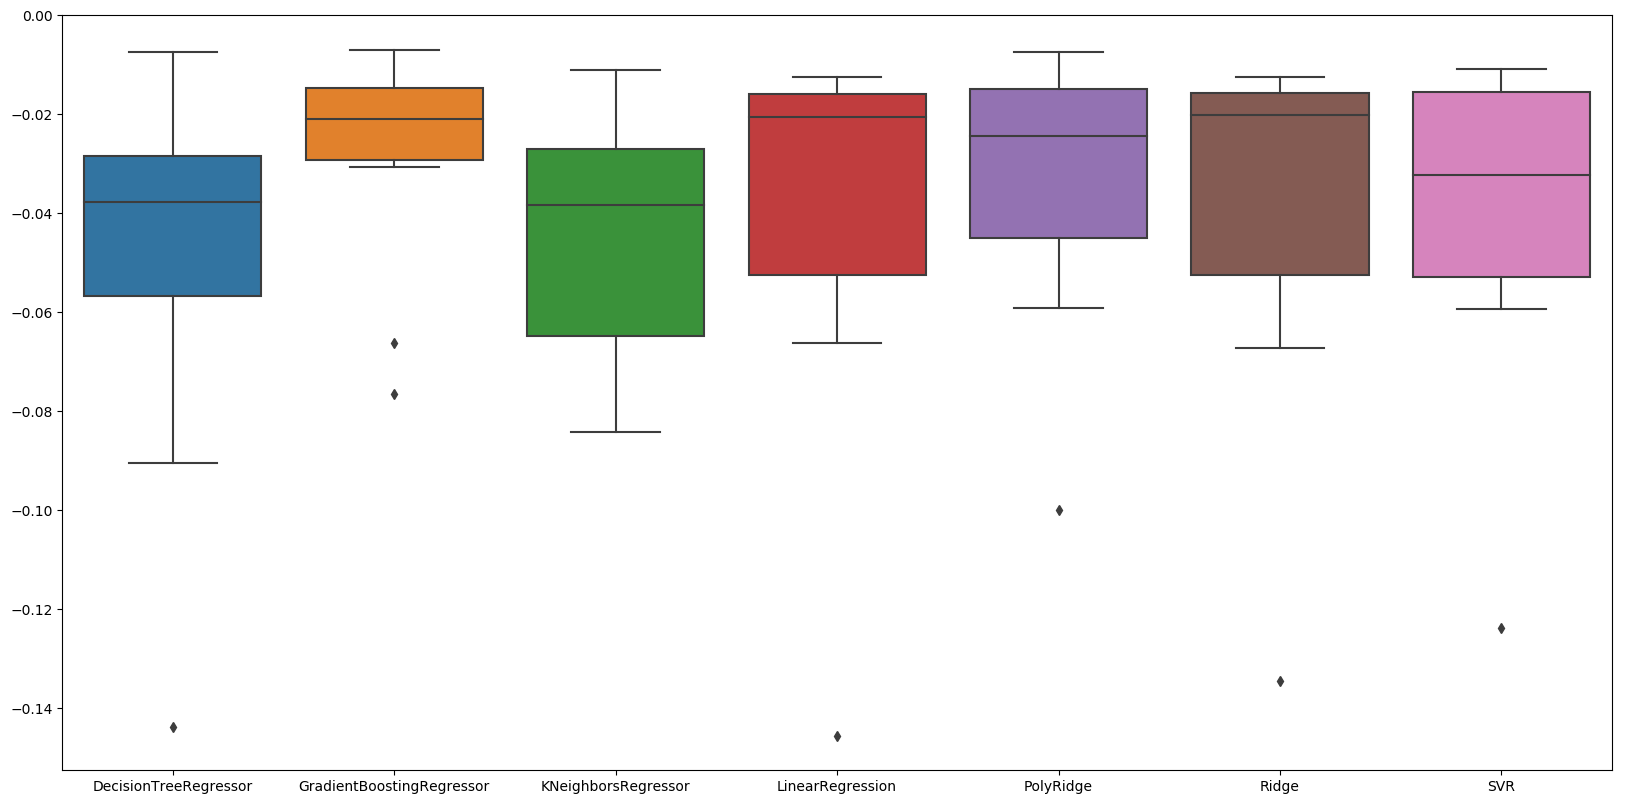

In [17]:
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)

## Lasso

$L = (1 / (2 * n_{samples})) * \|y - Xw\|^2_2 + \alpha * \|w\|_1$

Computing regularization path using the LARS ...
.

/Users/matt/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


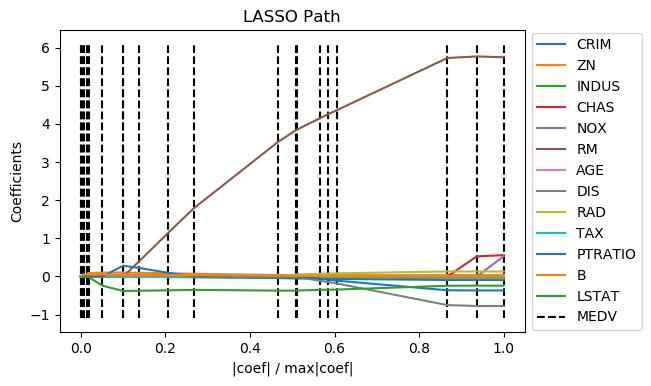

In [31]:
# rimuove MEDV perche' e' la variabile che vogliamo fittare
X = data.drop('MEDV',1).as_matrix()
y = data.MEDV

### LARS
print("Computing regularization path using the LARS ...")
_, _, coefs = linear_model.lars_path(X, y, method='lasso', verbose=True)

xx = np.sum(np.abs(coefs.T), axis=1)
xx /= xx[-1]

plt.plot(xx, coefs.T)
ymin, ymax = plt.ylim()
plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LASSO Path')
plt.axis('tight')
legend_x = 1
legend_y = 0.5
plt.legend(data.columns, loc='center left', bbox_to_anchor=(legend_x, legend_y) )
plt.show()